In [1]:
import matplotlib.pyplot as plt
from nn import Neuron, Layer, MLP
from sklearn.datasets import make_circles
import math
import numpy as np
from engine import Value

#### 1. Dataset overview

In [2]:
# random_state defines the postions of the dots in the dataset. If no number it changes(shuffles)
X, Y = make_circles(random_state=42)
# Coordinates in 2D
print(X.shape)
# Labels (0 or 1)
print(Y.shape)
list(X[:6])

(100, 2)
(100,)


[array([-0.42866144, -0.67546234]),
 array([0.74382119, 0.29449964]),
 array([-0.6472136,  0.4702282]),
 array([ 0.80901699, -0.58778525]),
 array([ 0.72896863, -0.68454711]),
 array([ 0.18738131, -0.98228725])]

In [3]:
# training set
numExamples = int(X.shape[0] * 0.70)
X_train = X[:numExamples]
Y_train = Y[:numExamples]

# Test set
X_test = X[numExamples:]
Y_test = Y[numExamples:]

#### Plot the dots

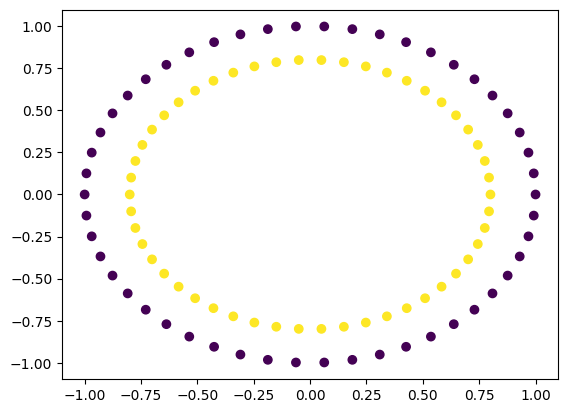

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

#### 2. Learning 

In [5]:
#loss = y[1] * math.log(max(ypred[1])) + (1 - y[1]) * math.log(max(1 - ypred[1]))

In [5]:
'''xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
y = [1.0, 0.0, 1.0, 0.0] # desired targets'''

In [4]:
n = MLP(2, [18, 18, 1])

In [5]:
total_samples = len(Y)
for k in range(200):

  # forward pass
  ypred = [n(x) for x in X]
  #loss = sum((yout - ygt)**2 for ygt, yout in zip(y, ypred))
 # print(ypred)
 # need -sum 
  #print(ypred)
  loss = -sum([Y[i] * ypred[i].log() + (1 - Y[i]) * (1 - ypred[i]).log() for i in range(total_samples)]) / total_samples
  #print([(y[i] * ypred[i].log()) + (1 - y[i]) * (1 - ypred[i].log()) for i in range(total_samples)])
  #print(f"Round {k}, Predictions: {[yp.data for yp in ypred]}, Loss: {loss.data}")
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

      # Print gradients for debugging
  for i, p in enumerate(n.parameters()):
      #print(f"Param {i}, Grad: {p.grad}")
      pass
  
  correct_redictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == 0) else 0 for y, ypred in zip(Y, ypred)])
  accuracy = correct_redictions / total_samples
  
  print(f"Round {k}, Loss: {loss.data}, Accuracy: {accuracy}")

Round 0, Loss: 1.8008249966818801, Accuracy: 0.5
Round 1, Loss: 0.74816745439064, Accuracy: 0.53
Round 2, Loss: 0.659077110114471, Accuracy: 0.6
Round 3, Loss: 0.6482009710681632, Accuracy: 0.73
Round 4, Loss: 0.6273123378134425, Accuracy: 0.73
Round 5, Loss: 0.604729491954114, Accuracy: 0.72
Round 6, Loss: 0.60113277141609, Accuracy: 0.75
Round 7, Loss: 0.5854199732991474, Accuracy: 0.79
Round 8, Loss: 0.6238902126080668, Accuracy: 0.62
Round 9, Loss: 0.5997778506760765, Accuracy: 0.6
Round 10, Loss: 0.8118260912019618, Accuracy: 0.56
Round 11, Loss: 0.7180611761560983, Accuracy: 0.59
Round 12, Loss: 0.620597487990862, Accuracy: 0.68
Round 13, Loss: 0.5742656774943682, Accuracy: 0.79
Round 14, Loss: 0.5808369777706697, Accuracy: 0.7
Round 15, Loss: 0.5650602932132077, Accuracy: 0.66
Round 16, Loss: 0.6392546800319385, Accuracy: 0.59
Round 17, Loss: 0.5750619669256796, Accuracy: 0.66
Round 18, Loss: 0.6580567632997186, Accuracy: 0.56
Round 19, Loss: 0.573321433400843, Accuracy: 0.64
Ro

--------

In [11]:
print(X[3])
print(Y[3])

[ 0.80901699 -0.58778525]
0


In [12]:
n(X[3])

Value(data=0.07431152558763301)

In [16]:
network = MLP(3, [10, 10, 1])

In [10]:
total_samples = len(Y_train)
params = []
for p in network.parameters():
  params.append(p)

numParams = len(params)
batch_size = 5
epochs = 10
learning_rate = -0.05

for epoch in range(epochs):
  # shuffle per each epoch
  indices = np.random.permutation(X_train.shape[0])
  # Shuffle both arrays using the generated indices
  X_shuffled = X[indices]
  Y_shuffled = Y[indices]

  # loss and accuracy
  total_loss = 0.0
  correct_predictions = 0

  for i in range(0, X_shuffled.shape[0], batch_size):

    X_batch = X_shuffled[i:i + batch_size]
    Y_batch = Y_shuffled[i:i + batch_size]

    # forward pass
    ypred = [network(x) for x in X_batch]
    #loss
    loss = -sum([i * ypred[i].log() + (1 - i) * (1 - ypred[i]).log() for i in Y_batch]) / batch_size
    total_loss += loss
    
    # backward pass
    for p in range(0, X_shuffled.shape[0], batch_size):
      params[p].grad = 0.0
    loss.backward()
    
    # update params
    for p in range(0, X_shuffled.shape[0], batch_size):
      params[p].grad += learning_rate * params[p].grad

    predictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == 0) else 0 for y, ypred in zip(Y_batch, ypred)])
    correct_predictions += predictions

  
  accuracy = correct_predictions / total_samples
  print(f"Round {epoch}, Loss: {loss.data}, accuracy {accuracy}")

Round 0, Loss: 0.8307820480534642, accuracy 0.5571428571428572
Round 1, Loss: 1.1228319958941544, accuracy 0.5571428571428572
Round 2, Loss: 1.020824577997211, accuracy 0.5571428571428572
Round 3, Loss: 1.018107103363698, accuracy 0.5571428571428572
Round 4, Loss: 0.6107362165377912, accuracy 0.5571428571428572
Round 5, Loss: 0.7093254448387558, accuracy 0.5571428571428572
Round 6, Loss: 0.5776348487681813, accuracy 0.5571428571428572
Round 7, Loss: 1.0943530456824082, accuracy 0.5571428571428572
Round 8, Loss: 0.9042197856719436, accuracy 0.5571428571428572
Round 9, Loss: 1.5112754253366893, accuracy 0.5571428571428572


In [11]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 337


In [12]:
from nn import Module

# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, Y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

Value(data=0.5460634703461756) 0.5
step 0 loss 0.5460634703461756, accuracy 50.0%
step 1 loss 0.5169433994417539, accuracy 50.0%
step 2 loss 0.5147325466816796, accuracy 50.0%
step 3 loss 0.5138936882914334, accuracy 50.0%
step 4 loss 0.5133914466252794, accuracy 50.0%
step 5 loss 0.5131055162254666, accuracy 50.0%
step 6 loss 0.5129166717448459, accuracy 50.0%
step 7 loss 0.5127589145787049, accuracy 50.0%
step 8 loss 0.5126438476656271, accuracy 50.0%
step 9 loss 0.5125588997128613, accuracy 50.0%
step 10 loss 0.5124890711497643, accuracy 50.0%
step 11 loss 0.5124284957614388, accuracy 50.0%
step 12 loss 0.512374353748546, accuracy 50.0%
step 13 loss 0.512332075638169, accuracy 50.0%
step 14 loss 0.512296259698289, accuracy 50.0%
step 15 loss 0.5122638393970623, accuracy 50.0%
step 16 loss 0.512236446855905, accuracy 50.0%
step 17 loss 0.5122117960216578, accuracy 50.0%
step 18 loss 0.512188444968352, accuracy 50.0%
step 19 loss 0.5121692180616059, accuracy 50.0%
step 20 loss 0.51215

In [17]:
n = MLP(2, [8, 8, 1]) 

In [19]:
total_samples = len(Y)
for k in range(100):
  
  # forward pass
  ypred = [n(x) for x in X]
  #loss = sum((yout - ygt)**2 for ygt, yout in zip(y, ypred))
 # print(ypred)
 # need -sum 
  #print(ypred)
  loss = -sum([Y[i] * ypred[i].log() + (1 - Y[i]) * (1 - ypred[i]).log() for i in range(total_samples)]) / total_samples
  #print([(y[i] * ypred[i].log()) + (1 - y[i]) * (1 - ypred[i].log()) for i in range(total_samples)])
  #print(f"Round {k}, Predictions: {[yp.data for yp in ypred]}, Loss: {loss.data}")
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

      # Print gradients for debugging
  for i, p in enumerate(n.parameters()):
      #print(f"Param {i}, Grad: {p.grad}")
      pass
  
  correct_redictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == 0) else 0 for y, ypred in zip(Y, ypred)])
  accuracy = correct_redictions / total_samples
  
  
  print(f"Round {k}, Loss: {loss.data}, accuracy {accuracy}")

Round 0, Loss: 0.6778658374855362, accuracy 0.63
Round 1, Loss: 0.6740038897775135, accuracy 0.62
Round 2, Loss: 0.6677814894340043, accuracy 0.58
Round 3, Loss: 0.6750040851017212, accuracy 0.62
Round 4, Loss: 0.6699145698277633, accuracy 0.61
Round 5, Loss: 0.6687483743814506, accuracy 0.64
Round 6, Loss: 0.6708696149262212, accuracy 0.68
Round 7, Loss: 0.6815904913497945, accuracy 0.55
Round 8, Loss: 0.6727739688917361, accuracy 0.65
Round 9, Loss: 0.6636976496316478, accuracy 0.61
Round 10, Loss: 0.6677279546026916, accuracy 0.69
Round 11, Loss: 0.6666623429466518, accuracy 0.67
Round 12, Loss: 0.6628881178953793, accuracy 0.56
Round 13, Loss: 0.6680131519600586, accuracy 0.68
Round 14, Loss: 0.6624347185953664, accuracy 0.62
Round 15, Loss: 0.6628607975818432, accuracy 0.61
Round 16, Loss: 0.6651474031501546, accuracy 0.68
Round 17, Loss: 0.6708002649446475, accuracy 0.62
Round 18, Loss: 0.6627509165660114, accuracy 0.65
Round 19, Loss: 0.6605514107388033, accuracy 0.57
Round 20, 

(-1.9980267284282716, 1.7519732715717284)

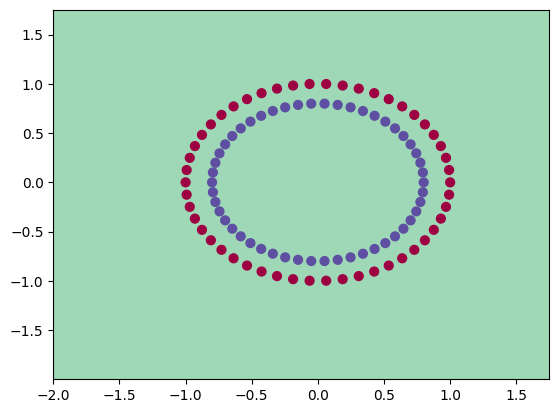

In [14]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(network, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

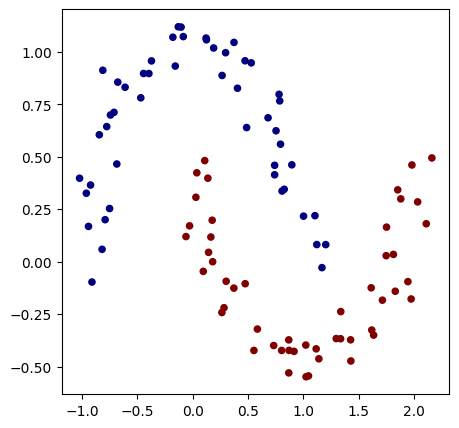

In [2]:
import random
np.random.seed(1337)
random.seed(1337)
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X_new, Y_new = make_moons(n_samples=100, noise=0.1)

Y_new = Y_new*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X_new[:,0], X_new[:,1], c=Y_new, s=20, cmap='jet')

In [5]:
model2 = MLP(2, [16, 16, 1])

In [6]:
total_samples = len(Y_train)
for k in range(10):
  
  # forward pass
  ypred = [model2(x) for x in X_train]
  #loss = sum((yout - ygt)**2 for ygt, yout in zip(y, ypred))
 # print(ypred)
 # need -sum 
  #print(ypred)
  loss = -sum([Y_train[i] * ypred[i].log() + (1 - Y_train[i]) * (1 - ypred[i]).log() for i in range(total_samples)]) / total_samples
  #print([(y[i] * ypred[i].log()) + (1 - y[i]) * (1 - ypred[i].log()) for i in range(total_samples)])
  #print(f"Round {k}, Predictions: {[yp.data for yp in ypred]}, Loss: {loss.data}")
  
  # backward pass
  for p in model2.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in model2.parameters():
    p.data += -0.0001 * p.grad

      # Print gradients for debugging
  #for i, p in enumerate(model2.parameters()):
      #print(f"Param {i}, Grad: {p.grad}")
  
  correct_redictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == -1) else 0 for y, ypred in zip(Y_train, ypred)])
  accuracy = correct_redictions / total_samples
  
  
  print(f"Round {k}, Loss: {loss.data}, accuracy {accuracy}")

Round 0, Loss: 0.935469811281775, accuracy 0.2714285714285714
Round 1, Loss: 0.9350284824672942, accuracy 0.2714285714285714
Round 2, Loss: 0.9346311077477346, accuracy 0.2714285714285714
Round 3, Loss: 0.9341971773013567, accuracy 0.2714285714285714
Round 4, Loss: 0.9337774252692341, accuracy 0.2714285714285714
Round 5, Loss: 0.9333538957511996, accuracy 0.2714285714285714
Round 6, Loss: 0.93281957814176, accuracy 0.2714285714285714
Round 7, Loss: 0.9324209947209982, accuracy 0.2714285714285714
Round 8, Loss: 0.9318735612569407, accuracy 0.2714285714285714
Round 9, Loss: 0.9313731994315563, accuracy 0.2714285714285714


In [8]:
def loss(batch_size = None):

    if batch_size is None:
        Xb, yb = X_train, Y_train
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], Y[ri]
    
    ypred = [model2(x) for x in Xb]
    loss = -sum([yb[i] * ypred[i].log() + (1 - yb[i]) * (1 - ypred[i]).log() for i in range(len(yb))]) / len(Xb)
    
    correct_predictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == 0) else 0 for y, ypred in zip(yb, ypred)])
    accuracy = correct_predictions / len(Xb)

    return loss, accuracy

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.802498996088474) 0.5714285714285714


In [38]:
for k in range(10):
    #fp
    total_loss, acc = loss()
    #bp
    model2.zero_grad()
    total_loss.backward()
    #update
    lr = 0.001
    for p in model2.parameters():
        p.data -= lr * p.grad
    
    print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.2645599134713583, accuracy 98.57142857142858%
step 1 loss 0.26458369538292814, accuracy 98.57142857142858%
step 2 loss 0.26449125488698016, accuracy 98.57142857142858%
step 3 loss 0.2642634736501875, accuracy 100.0%
step 4 loss 0.26432249616992404, accuracy 98.57142857142858%
step 5 loss 0.26438809807408936, accuracy 98.57142857142858%
step 6 loss 0.2644209308284665, accuracy 98.57142857142858%
step 7 loss 0.2644095349890859, accuracy 98.57142857142858%
step 8 loss 0.2640699434962063, accuracy 100.0%
step 9 loss 0.2637319697545931, accuracy 100.0%


In [40]:
ypred_test = [model2(x) for x in X_test]
correct_predictions = sum([1 if (ypred.data > 0.5 and y == 1) or (ypred.data <= 0.5 and y == 0) else 0 for y, ypred in zip(Y_test, ypred_test)])
accuracy = correct_predictions / len(Y_test)
accuracy

0.8666666666666667